# UBC MRI Research Python Workshop 2

## August 22 2017



1. Higher dimension numpy arrays
    * Indexing
    * Slicing
    * Boolean Masks
        * Exercise: Mask one array with another array of the same shape
   
2. Object-oriented programing
    * Writing classes
    * Initializing and manipulating objects
        * Exercise: Create an Image class
        
3. Matplotlib plotting
    * Plotting the object-oriented way
    * Changing plot attributes
    * Subplots
        * Exercise: Plot a 2D image
        
4. Curve fitting
    * Linear transform
        * Exercise: scipy.optimize.curve_fit()
        
5. Pandas
    * Importing and examining dataframes
    * Indexing dataframes
    * Condition indexing
    * Plotting
        * Exercise: Vancouver Open Data Catalogue
    

## Numpy indexing

https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

In [128]:
arr = np.random.randint(0,100,(8,8))

In [129]:
print(arr)
print(arr.shape)

[[51 97 28 70 13 56 28 89]
 [10 79 80 41 14 11 78 13]
 [94 91 42 75 91 35 57  7]
 [65 47  1 19 42 49 85 19]
 [39 81 88 32 73 45 80 40]
 [35 17 62  9  7 86  7  5]
 [81 33 74 97 70 97 58 85]
 [25 42 87 49 38 76 22 61]]
(8, 8)


In [130]:
arr[1,2]

80

In [257]:
arr[1]

array([10, 79, 80, 41, 14, 11, 78, 13])

In [176]:
arr[1:6,2]

array([80, 42,  1, 88, 62])

In [177]:
arr[1:,2]

array([80, 42,  1, 88, 62, 74, 87])

In [178]:
arr[:,2]

array([28, 80, 42,  1, 88, 62, 74, 87])

In [134]:
arr[1:6:2,2]

array([80,  1, 62])

### Slicing summary: (start:stop:step)

In [138]:
arr[1::2,2]

array([80,  1, 62, 87])

In [139]:
arr[::-1,2]

array([87, 74, 62, 88,  1, 42, 80, 28])

### Boolean masks

In [180]:
arr == 19

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False,  True, False, False, False,  True],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]], dtype=bool)

In [181]:
arr > 19

array([[ True,  True,  True,  True, False,  True,  True,  True],
       [False,  True,  True,  True, False, False,  True, False],
       [ True,  True,  True,  True,  True,  True,  True, False],
       [ True,  True, False, False,  True,  True,  True, False],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True, False,  True, False, False,  True, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]], dtype=bool)

In [182]:
arr[arr > 19]

array([51, 97, 28, 70, 56, 28, 89, 79, 80, 41, 78, 94, 91, 42, 75, 91, 35,
       57, 65, 47, 42, 49, 85, 39, 81, 88, 32, 73, 45, 80, 40, 35, 62, 86,
       81, 33, 74, 97, 70, 97, 58, 85, 25, 42, 87, 49, 38, 76, 22, 61])

In [ ]:
arr[]

## Exercise: Mask one array with another array of the same shape
* Create two arrays with random digits
* Find all entries in array 1 where array 2 is larger than N
* Take the mean of the result

Options
* Investigate the different ways to create random arrays in numpy
* Take the threshold N as the 90th percentile of array 2

## Higher dimensional arrays

In [140]:
arr3d = np.random.randint(0,100,(512,512,48))

In [141]:
arr3d.shape

(512, 512, 48)

In [143]:
myslice = arr3d[:,:,20]

In [144]:
myslice.shape

(512, 512)

In [145]:
myslices = arr3d[:,:,::2]

In [146]:
myslices.shape

(512, 512, 24)

In [147]:
arr4d = np.random.randint(0,100,(512,512,48,32))

In [148]:
arr4d.shape

(512, 512, 48, 32)

## Exercise: Take the mean across the 4th dimension (temporal averaging)

In [153]:
arr_tempmean = arr4d.mean(axis=3)

In [154]:
arr_tempmean.shape

(512, 512, 48)

## Classes and Objects

Classes are a smart way to organize your code. Instead of looping funtions, define a class to describe subjects, timepoints, events, etc and give the class attributes and methods.

Our first class will describe a subject in our study. Our class will be called "Subject", and it's only attribute will be the subject ID of a given subject.

In [155]:
class Subject():
    pass

In [156]:
sub1 = Subject()

In [157]:
sub1.subID = 'sub001'

Let's give the class some information when it's first called

In [158]:
class Subject():
    def __init__(self,subID):
        self.subID = subID
        

`__init__` is a special method. It is automatically called when the object is created. The first argument to `__init__` is always "self". "self" gives a method access to all the attributes of the object. Any other arguments are passed to the object when it is created, like when you run a subject.

With this simple class definition, we can create subject objects, pass subject IDs on creation, then access the subject ID on demand.

In [159]:
sub1 = Subject('01')

In [160]:
sub2 = Subject('02')

In [161]:
sub1.subID

'01'

In [162]:
sub2.subID

'02'

Let's expand the class to add some additional attributes, and a method which modifies those attributes

In [163]:
class Subject():
    def __init__(self,subID,data,date):
        self.subID = subID
        self.data = data
        self.date = date
        self.isclean = False
        
    def cleandata(self):
        # Set any negative values to zero
        self.data = [ 0 if x<0 else x for x in self.data ]
        self.isclean = True

In [164]:
sub3 = Subject('03',[-2,-1,0,1,2,3,4,5],'2017-08-20')

In [165]:
print(sub3.subID,sub3.data,sub3.date)

03 [-2, -1, 0, 1, 2, 3, 4, 5] 2017-08-20


In [166]:
sub3.cleandata()

In [14]:
sub3.data

[0, 0, 0, 1, 2, 3, 4, 5]

In [15]:
sub3.isclean

True

Finally, let's do some data validation. 

In the constructor, we'll check whether "data" is a list. If not we'll raise an error.

We'll also convert the "date" string into a date object that python understands.

Let's imagine that there was a calibration error for all data collected in 2016, so we need to increase all data values by 1 for dates in 2016 but not in 2017. We can add this to the cleandata() method.

In [16]:
from datetime import datetime

class Subject():
    def __init__(self,subID,data,date):
        # Check that data is a list
        if type(data) != list:
            raise ValueError("Argument data must be type 'list'")
        self.subID = subID
        self.data = data
        # Make the date attribute a python date
        self.date = datetime.strptime(date,'%Y-%m-%d')
        self.isclean = False
        
    def cleandata(self):
        # Set any negative values to zero
        self.data = [ 0 if x<0 else x for x in self.data ]
        self.isclean = True
        
        # Recalibrate data if collected in 2016
        if self.date.year == 2016:
            self.data = [x+1 for x in self.data]
            
    

First, let's make a new subject but pass the wrong type of data:

In [17]:
sub4 = Subject('04','-2,-1,0,1,2,3,4,5','2017-08-20')

ValueError: Argument data must be type 'list'

Now let's create two subjects with identical data, but with acquisition dates in different years

In [18]:
sub5 = Subject('05',[-2,-1,0,1,2,3,4,5],'2016-05-11')
sub6 = Subject('06',[-2,-1,0,1,2,3,4,5],'2017-05-11')

In [19]:
if (not sub5.isclean) and (not sub6.isclean):
    sub5.cleandata()
    sub6.cleandata()

In [20]:
print('Subject {}: {}'.format(sub5.subID,sub5.data))
print('Subject {}: {}'.format(sub6.subID,sub6.data))

Subject 05: [1, 1, 1, 2, 3, 4, 5, 6]
Subject 06: [0, 0, 0, 1, 2, 3, 4, 5]


## Class inheritence

Classes can inherit from each other. So, you can write a general Subject class that contains all the typical attributes of a research subject, then write a sub-class to customize it for your specific study

In [39]:
class MRISubject(Subject):
    pass

The above class inherits everything from the Subject class and adds nothing. We can do better! Let's add an attribute that's a list of scans acquired for this subject.

To do this, we need to modify the __init__ command. If we wanted, we could just write a new definition of __init__; but that would lose the work we did in the base class. Instead, we will define a new __init__ but bring in all the attributes from the base class as well.

Another change we will make is that the new attribut `scans` will be optional. We do this by assigning a default values in the __init__ definition. When this is done, the use can either set the value of scans themself or leave it blank.

In [52]:
class MRISubject(Subject):
    def __init__(self,subID,data,date,scans=None):
        # This super() function is magic. It copies in everything from the __init__ function of the base class
        super().__init__(subID,data,date)
        self.scans = scans

In [53]:
mrisub = MRISubject('09',[1,2,3,4,5],'2017-01-10',scans=['DTI','3DT1','T2GRASE'])

In [54]:
mrisub.scans

['DTI', '3DT1', 'T2GRASE']

## \*args and \*\*kwargs (optional)
We can generalize function inputs so that we don't have to type out all the inputs to the __init__ function (or any funtion) every time. Instead, we can use \*args and \*\*kwargs

```def myfunction(*args,**kwargs):
    input1 = args[0]
    ...
    opt_input1 = kwargs['key1']
    ...
```


The single star bundles up all mandatory arguments into a list called `args`. The double star bundles up all optional arguments into a dictionary called `kwargs` with key:value pairs. The actual variable names "args" and "kwargs" can be anything you want, but are used by convention. Let's use this concept to simplify our class inputs.

In [24]:
class MRISubject(Subject):
    def __init__(self,*args,**kwargs):
        # This super() function is magic. It copies in everything from the __init__ function of the base class
        super().__init__(*args)
        self.scans = kwargs['scans']

In [25]:
mrisub = MRISubject('09',[1,2,3,4,5],'2017-01-10',scans=['DTI','3DT1','T2GRASE','ASL'])

In [26]:
mrisub.scans

['DTI', '3DT1', 'T2GRASE', 'ASL']

## Exercise: Image Object

Create a class that defines a 3D image object. 
* Define a class called something like Image
* Write a method called "generate_image()" or similar that generates a 3D matrix of random values and assigns it as an attribute
* Write a method called "generate_mask()" that generates a 3D matrix of the same size as your first image. The mask should be all zeros except for a region of ones. Your mask can be simple or complex. Assign the mask as an attribute
* Write a method that takes the mean of the image matrix where mask values are 1

Things to think about:
* Which methods should be run automatically, and which should the user call?
* What other methods can we write?

In [183]:
class Image():
    pass

# Plotting with MatPlotLib

There are two ways to interact with MatPlotLib: the scripting interface (pyplot), or the object-oriented interface. Both produce the same results and are useful in different situations. This tutorial will mostly use the object-oriented technique since I like it more, but when looking things up online keep in mind that both exist

There are two main objects in MPL: The figure and the axis. Each figure is a separate image. Each axis contains one or more datasets visualizations. A figure can have any number of axes in it, but each axis belongs to a single figure.

The function `plt.subplots(n)` creates a figure with `n` axes arranged vertically. We'll start with one axis and then make it more complicated.

In [76]:
%matplotlib
from matplotlib import pyplot as plt

Using matplotlib backend: nbAgg


First, let's invent some data. Let's make 1000 evenly spaced points between 0 and 4$\pi$ on the x axis, and a cosine function as the y data:

In [242]:
xdata = np.linspace(0,4*3.14,num=1000)

In [243]:
ydata = np.cos(xdata)

Now, make the figure and axes objects and plot the data

<IPython.core.display.Javascript object>


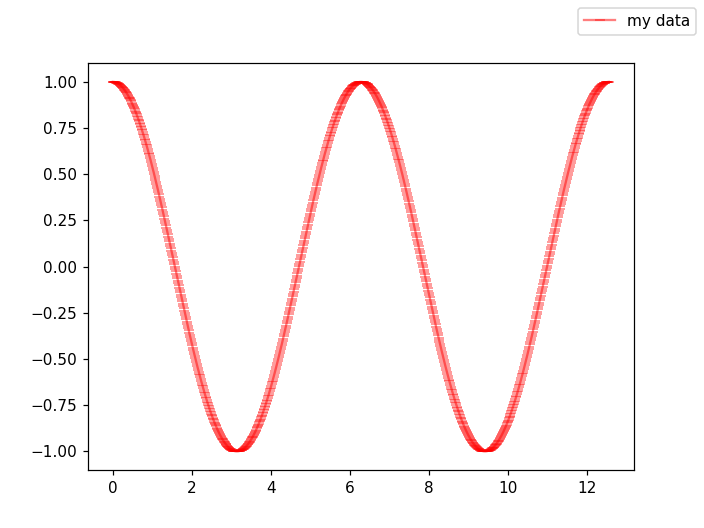

In [244]:
f, ax = plt.subplots(1)

In [245]:
cosline, = ax.plot(xdata,ydata)

So right now we have access to three major objects: The figure (`f`), the axis (`ax`), and the line (`cosline`). We can modify how the plot looks

In [246]:
cosline.set_color('red')

In [247]:
cosline.set_marker('_')

In [248]:
cosline.set_alpha(0.5)

In [249]:
ax.set_axis_off()

In [250]:
ax.set_axis_on()

In [251]:
f.legend([cosline],['my data'])

Let's start again with a new figure with 2 axes. Let's generate some random data for the second axis

In [252]:
ydata2 = np.random.random(1000)/5

<IPython.core.display.Javascript object>


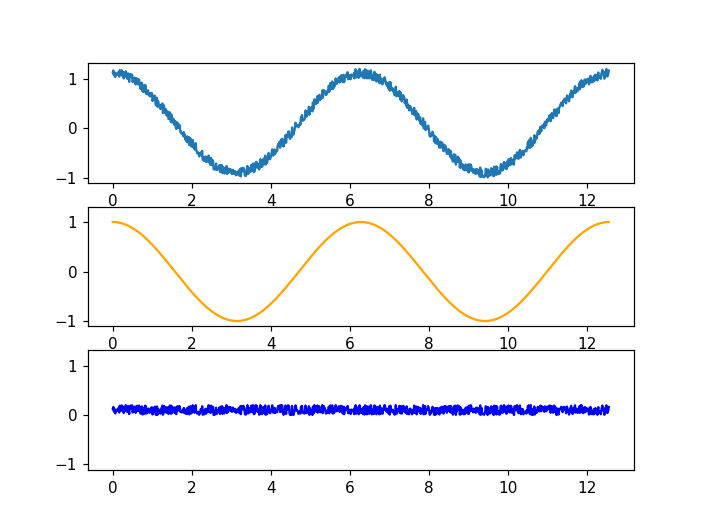

In [253]:
f,ax = plt.subplots(3,sharey=True)

Note that `ax` is now an array of axes. We access them with `ax[0]` and `ax[1]`

In [254]:
noisecosline, = ax[0].plot(xdata,ydata+ydata2)

In [255]:
cosline, = ax[1].plot(xdata,ydata,color='orange')

In [256]:
noiseline = ax[2].plot(xdata,ydata2,color='blue')

In [199]:
a.set_ylim?

We can make subplots in different arrangements simply

<IPython.core.display.Javascript object>


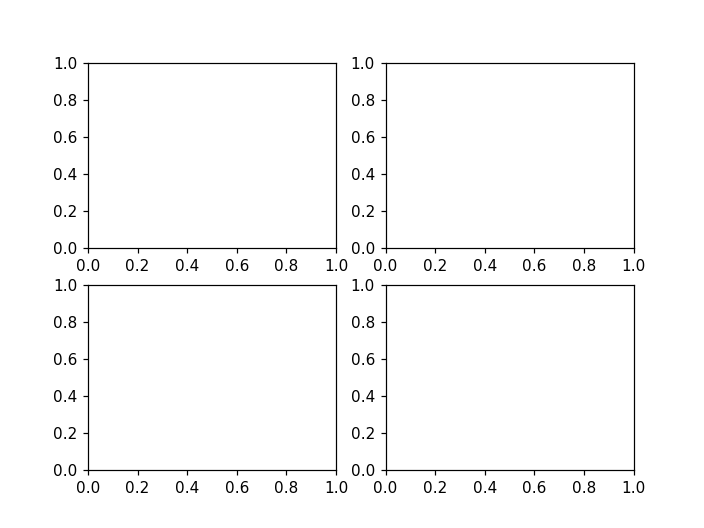

In [165]:
f,ax = plt.subplots(2,2)

Or make arrangments more complicated

<IPython.core.display.Javascript object>


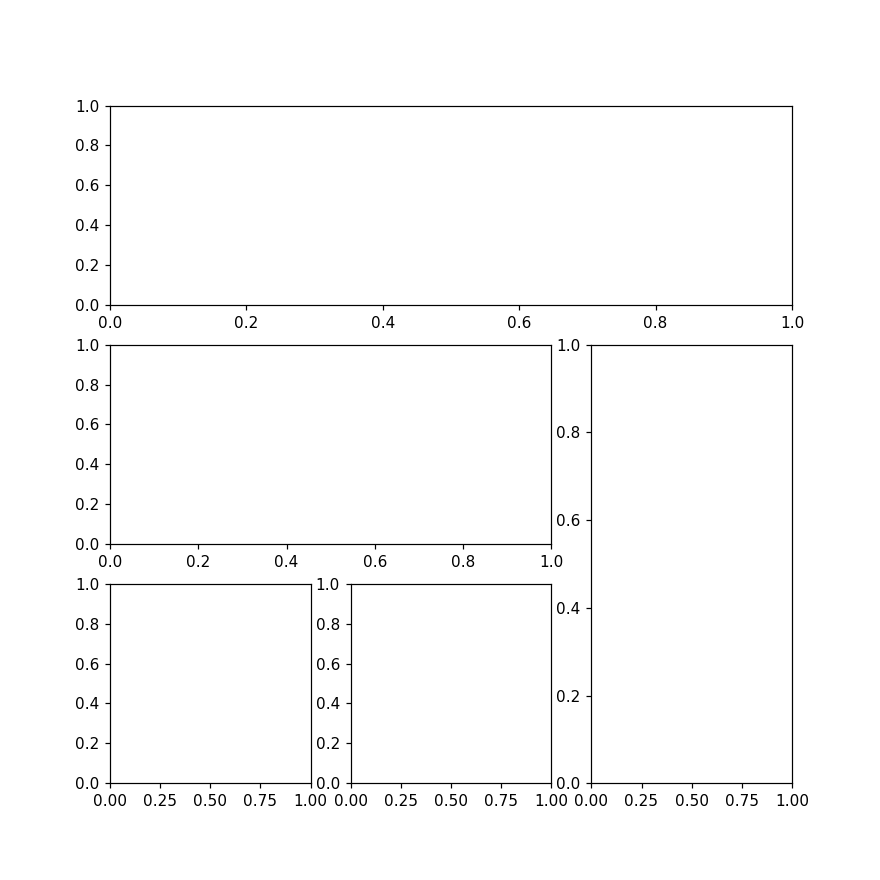

In [210]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(3, 3)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[1:, 2])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

## Exercise: Plot a 2D array with `matshow()`

* Create a 2D or 3D array
* Draw the 2D array (or a slice of the 3D array) with matshow
* Experiment with changing the properties of the plot

Optional:
* Add additional axes with more information

# Curve Fitting

Let's generate an exponential decay, and add some noise to the data.

In [55]:
xdata = np.linspace(1,32,32)

In [56]:
def exp_decay(t,A,T):
    return A*np.exp(-t/T)

Set the "true" values for A and T, then generate some sample data

In [108]:
A = 10
T = 20
ydata = exp_decay(xdata,A,T)

In [109]:
ynoise = np.random.random(32)/3
ydata = ydata + ynoise

<IPython.core.display.Javascript object>


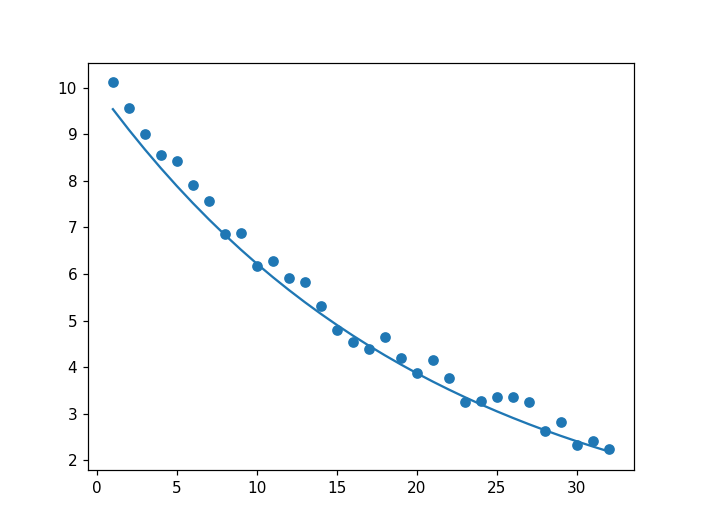

In [110]:
f,ax = plt.subplots()
ax.scatter(xdata,ydata+ynoise)

## Linear transform fit
If we know the data is exponential, it's quickest to transform the data and do a linear fit


$$ 
S = Ae^{{-t}/{T}}
$$
$$
\log{S} = \log{A} - \frac{t}{T} 
$$

Therefore when we plot log of signal vs time, 

$$
slope=-1/T
$$

In [75]:
ydatalog = np.log(ydata)

<IPython.core.display.Javascript object>


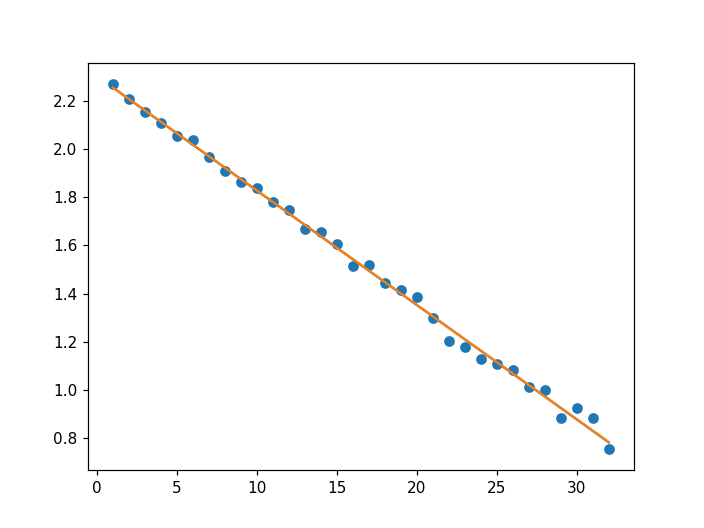

In [97]:
f2,ax2 = plt.subplots()
ax2.scatter(xdata,ydatalog)

In [99]:
m,b = np.polyfit(xdata,ydatalog,1)
m,b

(-0.047522720455900481, 2.3032296059967567)

In [105]:
ax2.plot(xdata,xdata*m+b)

Generate some new data based on our measured A and T values

In [100]:
A_measured = np.exp(b)
A_measured

10.00644720745845

In [101]:
T_measured = -1/m
T_measured

21.042566385229716

In [106]:
ydata_linfit = exp_decay(xdata,A_measured,T_measured)

In [111]:
ax.plot(xdata,ydata_linfit)

## Exercise: curve_fit
Use `scipy.optimize.curve_fit()` to fit the same ydata directly to the exponential decay function that we defined. Plot the fit. Is it better or worse than the linear fit?

In [112]:
from scipy.optimize import curve_fit
curve_fit?

## Exercise: Write an image class that can fit a curve across the time dimension

* Write an image generator method that generates a 4D image that contains a exponential decay timeseries along each voxel. Add some noise to make it realistic
* Keep the mask generator method from last time
* Write a method that computes the decay constant in each masked voxel
* Write a method that omputes the mean time constant in masked voxels and assign to to an attribute
* Write a method that plots some orthogonal slices
* Write a method that plots a histogram of the time constant distribution in masked voxels

Some tips:
* Take one step at a time
* Test frequently
* Use google! Anything that seems tricky probably has a simple solution

In [175]:
class Image4D(Image):
    pass

## Pandas
[pandas](http://pandas.pydata.org/) is the data analysis package in Python. It provides a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) object which acts like a spreadsheet. Let's import the package and some data:

In [184]:
import pandas as pd

The Vancouver Police Deparment publishes crime data through City of Vancouver's Open Data Catalogue. Let's import the data (prepared and posted at math.ubc.ca/~pwalls) using the `pandas.read_csv()` function:

In [185]:
data = pd.read_csv('http://www.math.ubc.ca/~pwalls/data/van_crime.csv')

Examine the top few lines to the dataframe

In [186]:
data.head()

,TYPE,YEAR,MONTH,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Mischief,2015,3,26XX E 49TH AVE,Victoria-Fraserview,496065.581256,5.452452e+06
1,Theft from Vehicle,2015,12,34XX WILLIAM ST,Hastings-Sunrise,497850.800800,5.457933e+06
2,Theft from Vehicle,2015,4,34XX WILLIAM ST,Hastings-Sunrise,497879.450446,5.457923e+06
3,Theft from Vehicle,2015,10,34XX WILLIAM ST,Hastings-Sunrise,497901.623450,5.457932e+06
4,Theft from Vehicle,2015,9,34XX WILLIAM ST,Hastings-Sunrise,497921.510576,5.457932e+06


User the `info` method to learn about the columns in the dataframe

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45802 entries, 0 to 45801
Data columns (total 7 columns):
TYPE             45802 non-null object
YEAR             45802 non-null int64
MONTH            45802 non-null int64
HUNDRED_BLOCK    45802 non-null object
NEIGHBOURHOOD    41815 non-null object
X                45802 non-null float64
Y                45802 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.4+ MB


Use the DataFrame method unique to see the different types of crimes in the dataset:

In [191]:
data['TYPE'].unique()

array(['Mischief', 'Theft from Vehicle', 'Other Theft', 'Theft of Vehicle',
       'Break and Enter Residential/Other', 'Offence Against a Person',
       'Homicide', 'Break and Enter Commercial'], dtype=object)

Notice that we select columns using brackets and the column name. There are some crimes that do not include the longitude and latitude coordinates due to privacy. Let's do a query and select the rows where the X coordinate is 0:

In [192]:
data[data['X'] == 0].head(10)

,TYPE,YEAR,MONTH,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
168,Offence Against a Person,2015,12,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
223,Offence Against a Person,2015,9,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
225,Offence Against a Person,2015,2,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
244,Offence Against a Person,2015,4,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
407,Offence Against a Person,2015,9,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
677,Offence Against a Person,2015,10,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
756,Offence Against a Person,2015,1,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
1047,Offence Against a Person,2015,5,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
1316,Offence Against a Person,2015,9,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0
1452,Offence Against a Person,2015,7,OFFSET TO PROTECT PRIVACY,NaN,0.0,0.0


To access individual cells, we can use Datafram methods `.loc` or `.iloc`

In [206]:
data.loc[5,'TYPE']

'Mischief'

In [208]:
data.iloc[5,0]

'Mischief'

<IPython.core.display.Javascript object>


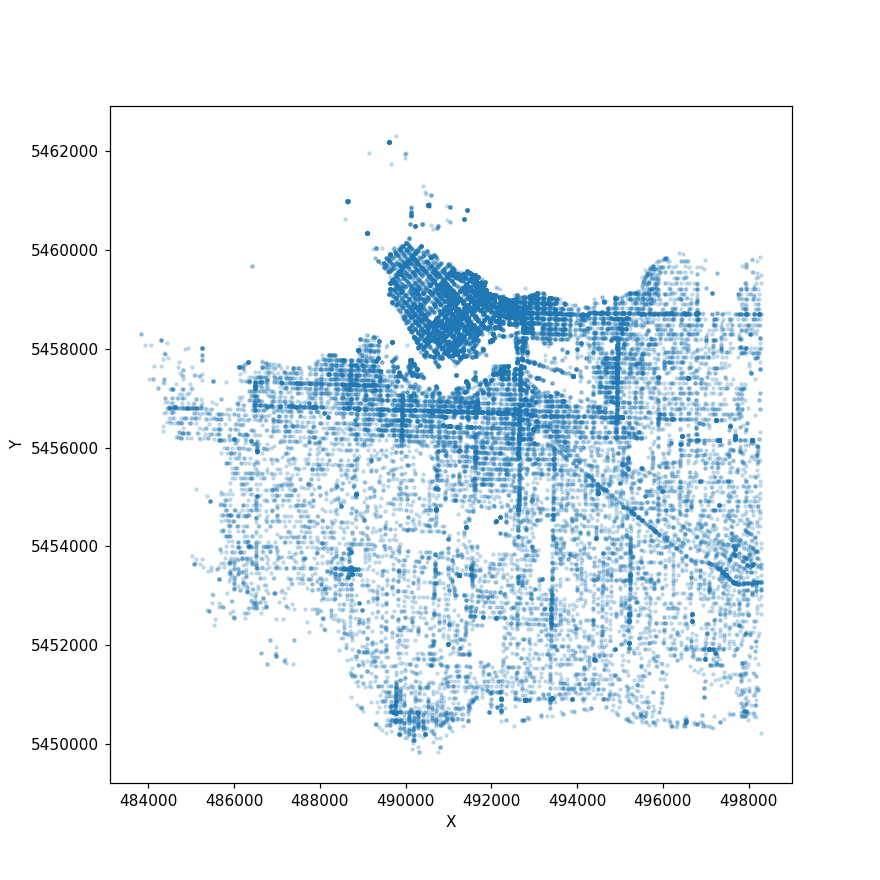

In [226]:
data[data['X'] > 0].plot(kind='scatter',x='X',y='Y',s=4,alpha=0.2,figsize=(8,8))


In [228]:
data[data['X'] > 0].to_csv('van_crime_with_location.csv')

## Exercise: Vancouver Open Data

Choose your own dataset from the (Vancouver Open Data catalogue)[http://data.vancouver.ca/datacatalogue/index.htm]. Filter and plot the data.